# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Grace Loisa]
- **Email:** [6162101065@student.unpar.ac.id]
- **ID Dicoding:** [graceloisa]

## Menentukan Pertanyaan Bisnis



*   Produk mana yang terjual paling banyak dan paling sedikit?
*  Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?
*   Jenis metode pembayaran apa yang paling umum digunakan oleh customer?
*   Berdasarkan umpan balik yang diterima, bagaiman tingkat kepuasan customer terhadap layanan yang diberikan?







## Import semua library yang dibutuhkan

Hal pertama yang perlu dilakukan dalam menganalisis data adalah proses import seluruh library yang dibutuhkan agar proses analisis dapat berjalan dengan baik.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
import requests
import io
import gdown
import os
import datetime as dt

## Data Wrangling

Data wrangling terdiri dari tiga tahap yaitu gathering data (pengumpulan data), assessing data (menilai data), dan cleaning data (membersihkan data).

### Gathering Data

Tahap ini merupakan tahap pengumpulan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang dihadapi

Memuat tabel customers menjadi DataFrame terlebih dahulu

In [50]:
customers_df = pd.read_csv("/content/E-commerce/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Memuat tabel orders menjadi DataFrame

In [51]:
orders_df= pd.read_csv("/content/E-commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Memuat tabel products dengan DataFrame

In [52]:
products_df = pd.read_csv("/content/E-commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Memuat tabel sellers dengan DataFrame

In [53]:
sellers_df = pd.read_csv("/content/E-commerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Memuat tabel geolocation dengan DataFrame

In [54]:
geolocation_df = pd.read_csv("/content/E-commerce/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Memuat tabel order items dengan DataFrame

In [55]:
order_items_df = pd.read_csv("/content/E-commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Memuat tabel order payments dengan DataFrame

In [56]:
order_payments_df = pd.read_csv("/content/E-commerce/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Memuat tabel order reviews dengan DataFrame

In [57]:
order_reviews_df = pd.read_csv("/content/E-commerce/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Memuat tabel products category dengan DataFrame

In [58]:
products_category_df = pd.read_csv("/content/E-commerce/product_category_name_translation.csv")
products_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Pada tahap ini akan dilakukan penilaian terhadap data-data tersebut untuk menilai kualitas dan struktur data serta dapat mengidentifikasi berbagai masalah pada data.

**Menilai data customers_df**

In [59]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Akan dicek apakah terdapat duplikasi data

In [60]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


cek statistik

In [61]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Menilai data orders_df**

In [62]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kejanggalan yaitu perbedaan pada jumlah data pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date sehingga akan dilihat jumlah missing valuesnya.

In [63]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Selanjutnya akan dicek apakah terdapat duplikasi data.

In [64]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


cek statistik

In [65]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Menilai data products_df**

In [66]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat kejanggalan yaitu perbedaan pada jumlah data pada kolomnya  sehingga akan dilihat jumlah missing valuesnya.

In [67]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Selanjutnya akan dicek apakah ada duplikasi data

cek statistik

In [68]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [69]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


**Menilai data sellers_df**

In [70]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Akan dicek apakah terdapat duplikasi data

In [71]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Menilai data geolocation_df**

In [72]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Akan dicek apakah terdapat duplikasi data

In [73]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


statistik

In [74]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Menilai data order_items_df**

In [75]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Akan dicek apakah terdapat duplikasi data

In [76]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


statistik

In [77]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai data order_payments_df

In [78]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Akan dicek apakah terdapat duplikasi data

In [79]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


statistik

In [80]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Menilai data order_reviews_df**

In [81]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kejanggalan yaitu perbedaan pada jumlah data pada kolom review_comment_title dan review_comment_message sehingga akan dilihat jumlah missing valuesnya.

In [82]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Selanjutnya, akan dicek apakah terdapat duplikasi data

In [83]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


statistik

In [84]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Menilai data products_category_df**

In [85]:
products_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Akan dicek apakah terdapat duplikasi data

In [38]:
print("Jumlah duplikasi: ", products_category_df.duplicated().sum())

Jumlah duplikasi:  0


statistik

In [39]:
products_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

Tahap ini adalah tahap pembersihan data dari masalah yang ditemukan pada proses assesing data. Tahap ini perlu dilakukan sebelum masuk tahap analis data.

**Cleaning untuk data tabel geolocation**

In [40]:
geolocation_df.drop_duplicates(inplace=True)

Setelah proses penghapusan, akan dicek kembali apakah prosesnya berjalan dengan lancar.

In [41]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning data tabel orders**

Diawali dengan memeriksa apakah ada nilai NaN dalam kolom-kolom tersebut lalu mengonversi nilai yang tidak bisa diparse menjadi Not a Time. Setelah itu konversikan kolom-kolom tersebut ke dalam type date time.

In [42]:
orders_columns=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
print(orders_df[orders_columns].isnull().sum())
for col in orders_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')


order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Cek kembali apakah Dtype nya sudah menjadi date time

In [43]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Cleaning untuk data tabel products**

Cek terlebih dahulu ada kolom apa saja yang ada di tabel products

In [44]:
print(products_df.columns)

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


Dilanjutkan dengan menghapus kolom yang dirasa tidak digunakan dalam proses analisis data.

In [45]:
product_drop_columns = ['product_name_lenght',
                        'product_description_lenght',
                        'product_weight_g',
                        'product_length_cm',
                        'product_height_cm',
                        'product_width_cm']
products_df.drop(product_drop_columns, axis= 1, inplace= True)

Lalu isi nilai yang hilang (missing value) yang ditemukan.

In [46]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

<ipython-input-46-20ade7a0f939>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
<ipython-input-46-20ade7a0f939>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Cek kembali apakah datanya sudah bersih

In [47]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


**Cleaning data tabel order_items**

Konversi kolom yang berisikan tanggal menjadi Dtype date time

In [48]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
  order_items_df[col]=pd.to_datetime(order_items_df[col])

Cek apakah data sudah bersih

In [86]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Cleaning data tabel order_reviews**

Diawali dengan menghapus kolom yang tidak digunakan dalam proses analisis

In [87]:
order_reviews_drop_cols=['review_comment_title', 'review_comment_message']
order_reviews_df.drop(order_reviews_drop_cols, axis=1, inplace= True)

In [88]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


Konversikan kolom yang memuat tanggal menjadi Dtype date tima

In [89]:
order_review_col=['review_creation_date', 'review_answer_timestamp']
for col in order_review_col:
  order_reviews_df[col]=pd.to_datetime(order_reviews_df[col])

Cek apakah data sudah bersih

In [90]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


## Exploratory Data Analysis (EDA)

Tahap eksplorasi data yang sudah bersih ini berguna untuk memperoleh insight dan menjawab pertanyaan analisis.

### Explore Customers DataFrame

Pertama akan dilihat dahulu apa saja yang ada di dalam DataFrame customers dengan mengambil 10 sample.

In [91]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
97767,592e40170cce9817780844caf7c0a2e9,f6db9c2162ee3658e5520c00a090b7c4,75105,anapolis,GO
1753,957be0f308e6fa876ef69064f6e24426,f7c7677be77763b1b2cf982a5e67fa61,22723,rio de janeiro,RJ
2007,8baeca32aac79a831b81f1f8af9fd6d8,59cd6345c0d1920b6a42f672173a78fd,13950,lindoia,SP
40062,90524e55a20cda4c520f6a6e893bda6f,be1d30e4bf79928d1f7e62529c2e855a,31320,belo horizonte,MG
81282,8f0c80240f693b7d3f30eb8e221bc6b7,4cc3a1902b27b866d2007af256cce7fc,15025,sao jose do rio preto,SP
88517,40b998e8c24e6641b7476c461741ceca,f62f0994e80e904a9f70e1a7fe8c0b60,1202,sao paulo,SP
45949,435da3cfae7de29e026be458763a4981,73595bddc6727413b0b83311fe7963dc,88160,biguacu,SC
12339,2200d408e95d53a468269d70b24516c9,a1b667ccfcab85f34445a0905ec39a2e,29141,cariacica,ES
79339,18df50d79545e4b86e36986c7271156b,25f72b0c191b2bf0c445696ea964cdce,26112,belford roxo,RJ
60080,f65ff32357fe40277ac5c181c4528b3b,bfe07ae940ae1ee62b78fd75029ed9fa,12944,atibaia,SP


Melihat rangkuman parameter statistiknya

In [92]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Melihat demografi pelanggan berdasarkan kota(city) tempat pembeli tinggal

In [93]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Selanjutnya, akan dilihat demografi pembeli berdasarkan negara bagian(state)

In [94]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Dari kedua demografi pembeli di atas, dapat dilihat bahwa pembeli terbanyak berasal dari Kota Sao Paulo dan Negara bagian Sao Paulo (SP). Pembeli paling sedikit terdapat di kota-kota seperti Rios dos Cedros, Laogao, dan lainnya, sedangkan untuk negara bagian dengan pembeli paling sedikit adalah Roraima (RR)

### Explore Order Payments DataFrame

Pertama akan dilihat dahulu apa saja yang ada di dalam DataFrame order payments dengan mengambil 10 sample.

In [95]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
75540,47cdfa4d3f0ebffd3064a5a7f1a1a901,1,credit_card,8,623.68
91806,2458de231bb0e4286a97ab335afb78c9,1,credit_card,5,174.08
55044,2cfbf3ae48a6f2a46384be9fbdf8c9ff,1,boleto,1,209.24
21047,80ba449ea98f8e879a829759b5a66294,1,credit_card,4,327.25
49104,99f6d132908e686db5ad8db097e76aa3,1,credit_card,2,110.70
73824,94a053909aea9a581821afd1e55e2776,1,credit_card,4,88.49
99606,e417011226af2bd3a4a21d51b2818e36,1,credit_card,7,77.66
63739,1782847cd777a73e73b847dc72144d19,1,credit_card,4,45.00
73070,67f755ebeb35fe46f6e389a1148a0f22,1,credit_card,4,256.47
38160,3cad2aa3b180252c0393e89cd3a7d449,1,credit_card,1,90.28


Rangkum parameter statistiknya

In [96]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Berdasarkan data di atas, terdapat rata-rata pengeluaran pembeli dalam satu kali pesanan yaitu sebesar 217.494064.

Pembeli akan dikelompokkan berdasarkan metode pembayaran yang digunakan

In [97]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Metode pembayaran yang paling banyak dipakai yaitu credit card dan paling jarang digunakan yaitu debit card

### Explore Customer dan Orders DataFrame

Menggabungkan customers_df dengan orders_df

In [98]:
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Selanjutnya, akan dicek status pada pembeli, status "active" merupakan status untuk pelanggan yang pernah melakukan pembelian minimal sekali, dan status "non active" untuk pelanggan yang belum pernah melakukan pembelian.

In [99]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
89359,62b1788eb836d7afcfc0c229b9a68887,67fc75e2bc13d70df5e001634158daed,18131,sao roque,SP,Active
18993,60be6efd06ea26069011a291c11a36c1,0a8410870387eb3928e0c70b3861dab1,4743,sao paulo,SP,Active
85413,2fa7b0fe956bffb7394467ca776543f2,002ed12115742033f015cb3c269ccf68,9271,santo andre,SP,Active
66462,32140932420c55308ddd876d2b6d7c15,edad2400b07f7f0421c2701b545b42eb,96402,bage,RS,Active
28471,7a33f21fe79a9a7c069e723b0c339a6c,32f49481cc9ebbfe06f2e63a2f5279cb,7123,guarulhos,SP,Active
60857,5c70d6e3e98eb5c6f7dcbea674e6f836,83bcfeb972ccaa57c18425b7e67ff5b5,5459,sao paulo,SP,Active
35877,bc3b70c375396b2103e9a3189309a0b9,78d5cb63ea2fa0684904906f0e4c9c95,35903,itabira,MG,Active
1200,c9e39e587b892b00ef702d57de1cf299,f0fe4ee68e4a03068e981e6481bb9e1e,11665,caraguatatuba,SP,Active
28527,7422f90b30b7fd4c519f7645a10c2404,d684856204b891809215375ac349fd03,36080,juiz de fora,MG,Active
82085,acea0f3313c150db4e2bde9d03b5f2ab,4f290954e4d7ca5af015b774e6eba94c,18074,sorocaba,SP,Active


Akan dihitung berapa pembeli yang memiliki status active dan non active

In [100]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


Ternyata terdapat 99441 pembeli yang minimal telah melakukan 1 kali pembelian

### Explore Orders dan Order Items DataFrame

Menggabungkan orders_df dan order_items_df guna mendapatkan informasi yang lebih lengkap tentang setiap pesanan termasuk detail barang yang dipesan.

In [101]:
orders_orderitems_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_orderitems_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Melihat status pesanan

In [102]:
orders_orderitems_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2



### Explore Orders dan Payments

Menggabungkan order_df dan order_payments_df berdasarkan order_id

In [103]:
orders_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


Akan ditelusuri apakah ada pesanan yang belum dibayar

In [104]:
orders_payments_df["payment_value"].fillna(0, inplace= True)
unpaid_orders_count = orders_payments_df[orders_payments_df["payment_value"]==0].shape[0]
print(f"Jumlah pesanan yang belum dibayar: {unpaid_orders_count}")

Jumlah pesanan yang belum dibayar: 10


<ipython-input-104-1ec27bec286d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_payments_df["payment_value"].fillna(0, inplace= True)


### Explore Reviews dan Orders

In [105]:
orders_reviews_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51



### Explore Products dan Products Category

Menggabungkan products_df dengan products_category_df

In [107]:
products = pd.merge(
    left=products_df,
    right=products_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [109]:
products.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


### Merge

Proses penggabungan beberapa DataFrame

**Merge orders_payments_df & orders_reviews_df berdasarkan order_id**

In [110]:
payments_reviews = pd.merge(
    left=orders_payments_df,
    right=orders_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,payment_sequential,payment_type,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58


**Merge customer_orders_df & payments_reviews berdasarkan order_id**

In [111]:
customers = pd.merge(
    left=customer_orders_df,
    right=payments_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


**Merge order_orderitems_df & products berdasarkan product_id**

In [112]:
orders = pd.merge(
    left=orders_orderitems_df,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery



### Explore All Data

Pertama, merge semua datanya kecuali geolocation dataset karena informasinya yang dibutuhkan sudah diwakilkan di customers_df .Hal ini dilakukan untuk melihat pola pembelian berdasarkan demografi pelanggan yang mampu menampung semua informasi tabel

In [113]:
all_data = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="order_id",
    right_on="order_id",
    suffixes=("_customers","_orders")
)
all_data.head()

,customer_id_customers,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status_customers,order_purchase_timestamp_customers,order_approved_at_customers,order_delivered_carrier_date_customers,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [114]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 56 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   customer_id_customers                    119143 non-null  object        
 1   customer_unique_id                       119143 non-null  object        
 2   customer_zip_code_prefix                 119143 non-null  int64         
 3   customer_city                            119143 non-null  object        
 4   customer_state                           119143 non-null  object        
 5   order_id                                 119143 non-null  object        
 6   order_status_customers                   119143 non-null  object        
 7   order_purchase_timestamp_customers       119143 non-null  object        
 8   order_approved_at_customers              118966 non-null  object        
 9   order_delivered_carrier_da

Akan dilihat preferensi pembelian berdasarkan state dan kategori produk.

In [119]:
all_data.groupby(by=["customer_state", "product_category_name"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name                              
AC             artigos_de_natal               69.90          60.95
               automotivo                    606.97         146.42
               bebes                         697.84         174.13
               beleza_saude                 1386.58         268.42
               brinquedos                    234.79          83.26
...                                             ...            ...
TO             portateis_casa_forno_e_cafe  1999.00          95.44
               relogios_presentes           5446.89         950.02
               telefonia                    1268.12         627.34
               telefonia_fixa               1390.99          53.58
               utilidades_domesticas        1349.55         587.65

[1368 rows x 2 columns]

Akan dilihat preferensi pembeli berdasarkan kota dan kategori produk

In [138]:
all_data.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name                        
abadia dos dourados cool_stuff              199.00          20.63
                    esporte_lazer           120.00          15.59
                    livros_interesse_geral   39.90          18.38
abadiania           eletroportateis         949.99          75.53
abaete              bebes                    65.00          17.70
...                                            ...            ...
ze doca             bebes                    74.80          38.07
                    esporte_lazer           149.90          38.60
                    ferramentas_jardim       39.90          26.61
                    instrumentos_musicais   359.00          49.04
zortea              informatica_acessorios   69.90          20.98

[25221 rows x 2 columns]

Akan dilihat preferensi pembeli berdasarkan state dan metode pembayaran yang digunakan

In [120]:
all_data.groupby("customer_state").agg({
    "payment_type": lambda x: ', '.join(x.dropna().astype(str).unique()),
    "payment_value": "sum"
}).reset_index()

,customer_state,payment_type,payment_value
0,AC,"credit_card, boleto, voucher, debit_card",24984.86
1,AL,"boleto, credit_card, voucher, debit_card",112296.47
2,AM,"credit_card, boleto, voucher, debit_card",34956.93
3,AP,"credit_card, boleto, voucher",21642.70
4,BA,"credit_card, debit_card, boleto, voucher",805070.98
5,CE,"credit_card, voucher, boleto, debit_card",349290.36
6,DF,"boleto, credit_card, voucher, debit_card",438095.32
7,ES,"credit_card, boleto, voucher, debit_card",408611.64
8,GO,"credit_card, boleto, voucher, debit_card",520481.65
9,MA,"credit_card, boleto, voucher, debit_card",200363.24


Melihat bagaimana review yang diberikan untuk setiap kategori produk.

In [137]:
all_data.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                           nunique          min  max
product_category_name                               
agro_industria_e_comercio      182          1.0  5.0
alimentos                      450          1.0  5.0
alimentos_bebidas              227          1.0  5.0
artes                          202          1.0  5.0
artes_e_artesanato              23          1.0  5.0
...                            ...          ...  ...
sinalizacao_e_seguranca        140          1.0  5.0
tablets_impressao_imagem        79          1.0  5.0
telefonia                     4199          1.0  5.0
telefonia_fixa                 217          1.0  5.0
utilidades_domesticas         5884          1.0  5.0

[73 rows x 3 columns]

**Convert all_data to .csv**

In [122]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang terjual paling banyak dan paling sedikit?

Untung menghitung banyaknya produk, pertama akan dilakukan grouping berdasarkan kategori produk Bahasa Inggris, lalu dihitung menggunakan count(), dan diurutkan dari jumlah penjualan produk yang paling tinggi.

In [123]:
sum_order_items_df = all_data.groupby("product_category_name")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products", "product_category_name":"category"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

sum_order_items_df.head()

,category,products
13,cama_mesa_banho,11988
11,beleza_saude,10032
32,esporte_lazer,9004
54,moveis_decoracao,8832
44,informatica_acessorios,8150


Selanjutnya jika diurutkan dari jumlah penjualan produk paling rendah/paling sedikit

In [124]:
sum_order_items_df.sort_values(by="products", ascending=True).head(5)

,category,products
67,seguros_e_servicos,2
37,fashion_roupa_infanto_juvenil,8
60,pc_gamer,10
17,cds_dvds_musicais,14
65,portateis_cozinha_e_preparadores_de_alimentos,15


**Visualisasi menggunakan bar chart**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

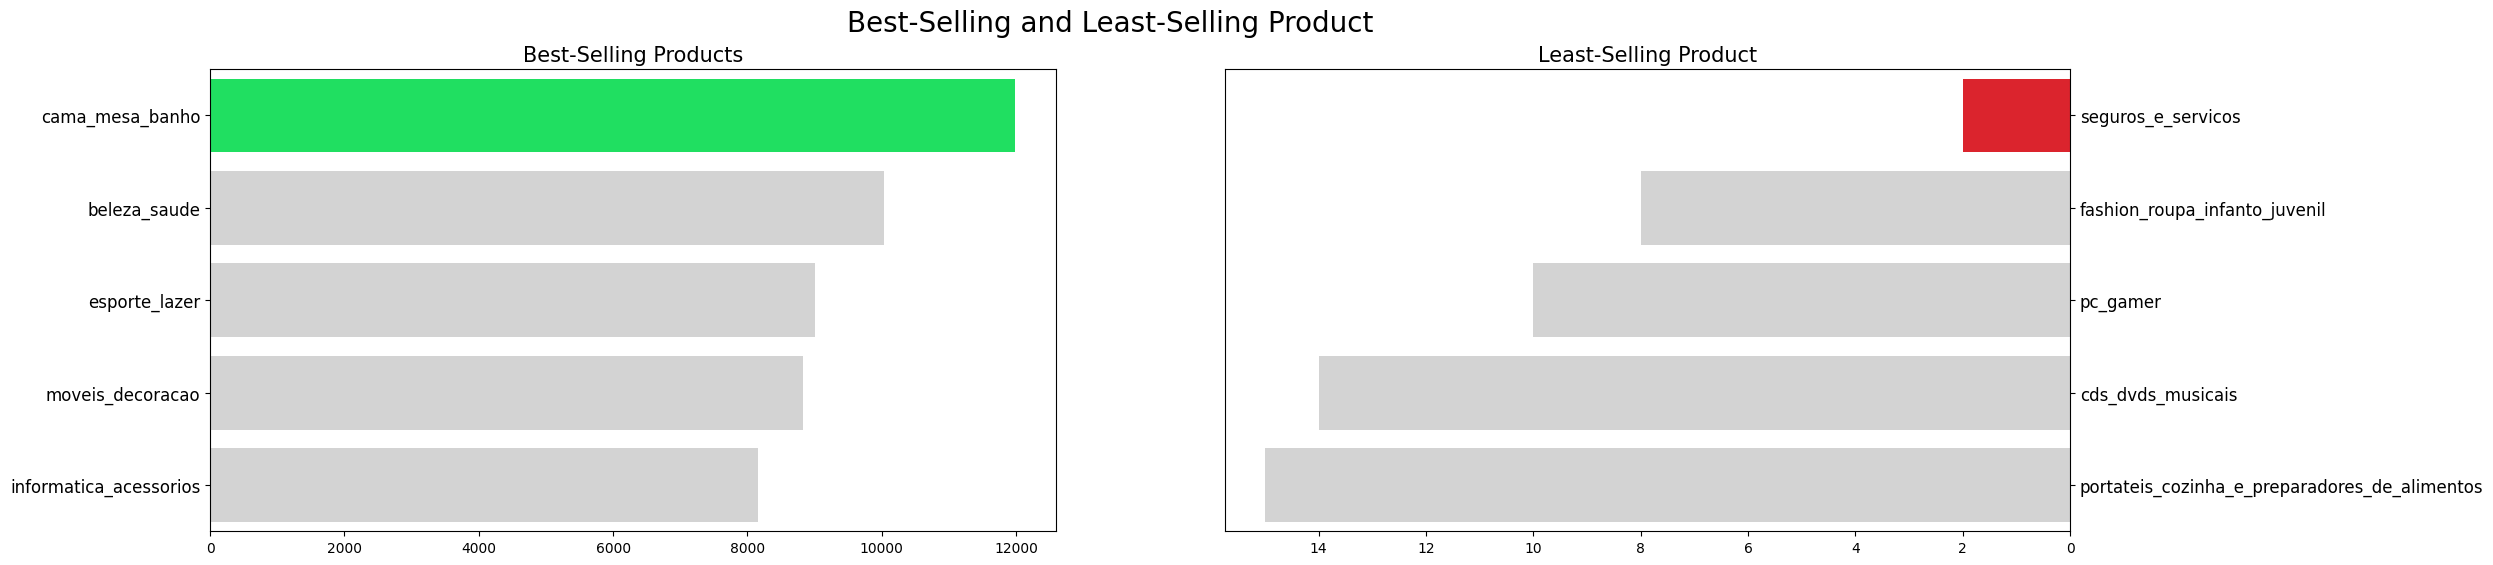

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors_best = ["#00FF57", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_least = ["#F90611", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


sns.barplot(x="products", y="category", data=sum_order_items_df.sort_values(by="products", ascending=False).head(5), palette=colors_best, hue="category", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best-Selling Products", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="products", y="category", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors_least, hue="category", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least-Selling Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best-Selling and Least-Selling Product", fontsize=20)
plt.show()

Berdasarkan bar chart di atas, dapat dilihat bahwa kategori produk **cama_mesa_banho** menjadi produk yang paling banyak terjual ditandai oleh bar warna hijau sedangkan untuk kategori produk **seguros_e_servicos** menjadi produk yang paling sedikit terjual ditandai oleh bar warna merah.

### Pertanyaan 2: Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?

Untuk pertanyaan ini, akan dikelompokkan terlebih dahulu berdasarkan state/negara bagiannya

In [126]:
bystate_df = all_data.groupby(by="customer_state")["customer_id_customers"].nunique().reset_index()
bystate_df.rename(columns={"customer_id_customers": "customer_count"}, inplace=True)
print(bystate_df)

   customer_state  customer_count
0              AC              81
1              AL             413
2              AM             148
3              AP              68
4              BA            3380
5              CE            1336
6              DF            2140
7              ES            2033
8              GO            2020
9              MA             747
10             MG           11635
11             MS             715
12             MT             907
13             PA             975
14             PB             536
15             PE            1652
16             PI             495
17             PR            5045
18             RJ           12852
19             RN             485
20             RO             253
21             RR              46
22             RS            5466
23             SC            3637
24             SE             350
25             SP           41746
26             TO             280


**Visualisasi menggunakan bar chart**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

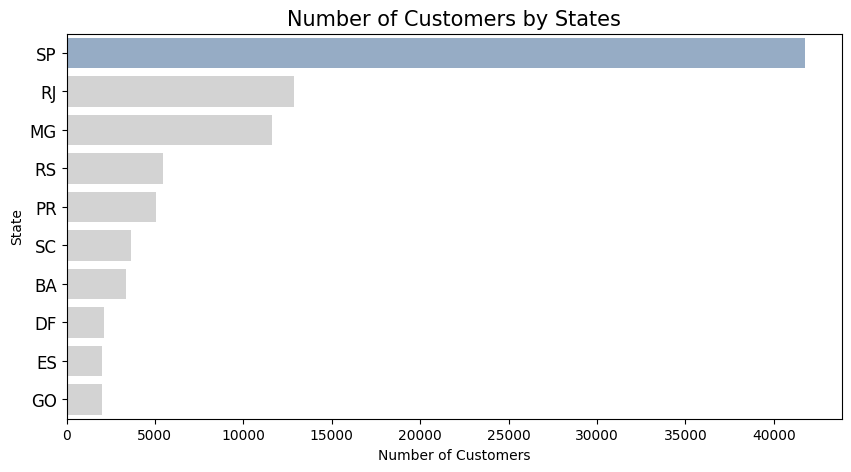

In [127]:
plt.figure(figsize=(10, 5))
colors1= ["#8EACCD", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(x="customer_count", y="customer_state", data=bystate_df.sort_values(by="customer_count", ascending=False).head(10), palette=colors1, hue="customer_state", legend=False)

plt.title("Number of Customers by States", loc="center", fontsize=15)
plt.ylabel("State")
plt.xlabel("Number of Customers")
plt.tick_params(axis='y', labelsize=12)

plt.show()


Selanjutnya dikelompokkan berdasarkan kota

In [128]:
bycity_df = all_data.groupby(by="customer_city")["customer_id_customers"].nunique().reset_index()
bycity_df.rename(columns={"customer_id_customers": "customer_count"}, inplace=True)
print(bycity_df)

            customer_city  customer_count
0     abadia dos dourados               3
1               abadiania               1
2                  abaete              12
3              abaetetuba              11
4                 abaiara               2
...                   ...             ...
4114             xinguara               9
4115          xique-xique               3
4116             zacarias               2
4117              ze doca               5
4118               zortea               2

[4119 rows x 2 columns]


**Visualisasi menggunakan bar plot**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

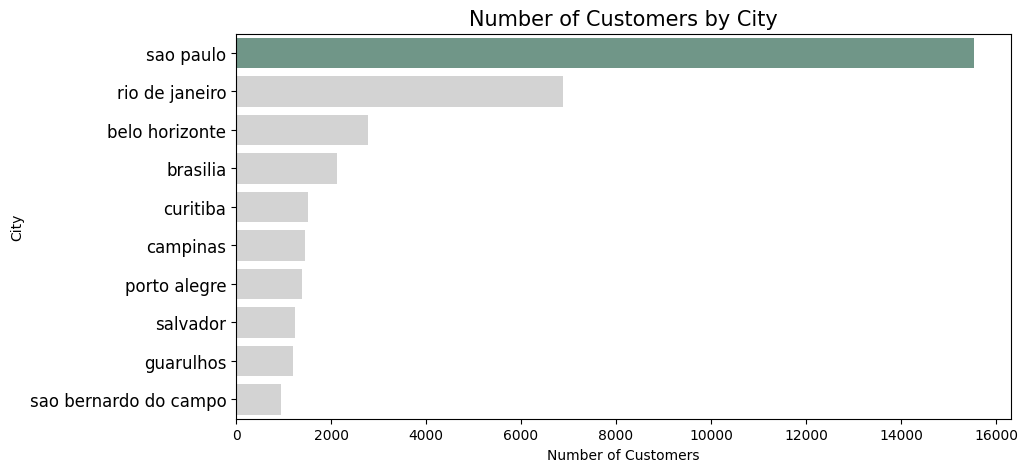

In [129]:
plt.figure(figsize=(10, 5))
colors1= ["#6A9C89", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(x="customer_count", y="customer_city", data=bycity_df.sort_values(by="customer_count", ascending=False).head(10), palette=colors1, hue="customer_city", legend=False)

plt.title("Number of Customers by City", loc="center", fontsize=15)
plt.ylabel("City")
plt.xlabel("Number of Customers")
plt.tick_params(axis='y', labelsize=12)

plt.show()

Berdasarkan bar chart di atas, dapat dilihat bahwa daerah yang melakukan paling banyak pembelian ada di negara bagian Sao Paulo (SP) dan di Kota Sao Paulo.

### Pertanyaan 3: Jenis metode pembayaran apa yang paling umum digunakan oleh customer?

Berikut adalah metode pembayaran yang paling sering digunakan di seluruh daerah demografis customer

In [130]:
payment_counts = all_data['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

**Visualisasi menggunakan bar chart**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

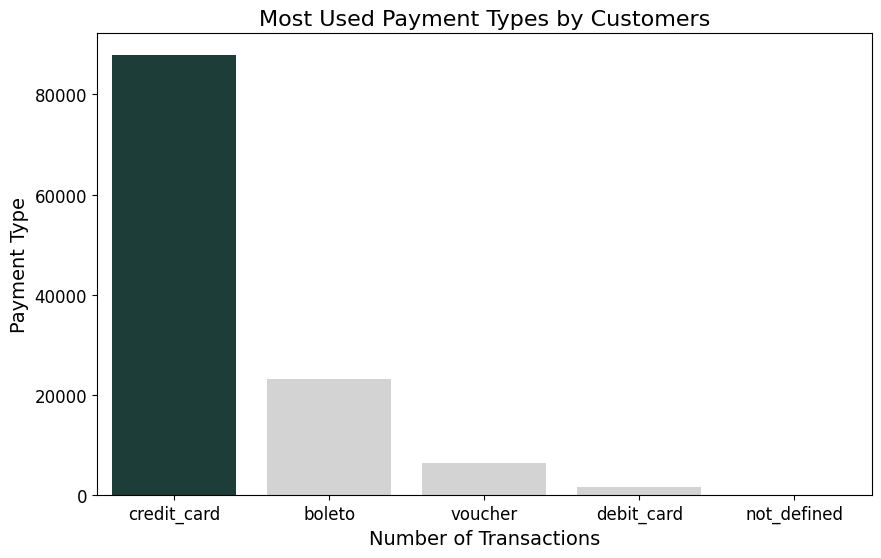

In [131]:
plt.figure(figsize=(10, 6))
colors2= ["#16423C", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
sns.barplot(x='payment_type', y='count', data=payment_counts, palette=colors2, hue="payment_type", legend=False)
plt.title('Most Used Payment Types by Customers', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Payment Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Dapat dilihat dari bar chart di atas, dari seluruh daerah demografis customer credit card adalah metode pembayaran yang paling sering digunakan dan memiliki perbedaan yang jauh dengan metode pembayaran lainnya.

State dengan pembeli terbanyak adalah Sao Paulo. Berikut adalah metode pembayaran yang paling sering digunakan di Sao Paulo yang divisualisasi menggunakan bar chart

In [132]:
state_payments = "SP"
filtered_data = all_data[all_data['customer_state'] == state_payments]

In [133]:
payment_counts = filtered_data['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

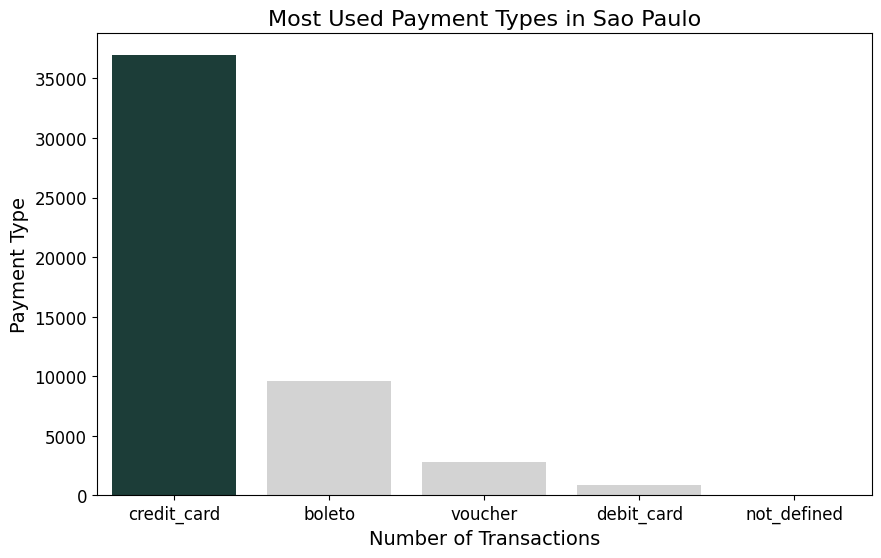

In [134]:
plt.figure(figsize=(10, 6))
colors2= ["#16423C", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
sns.barplot(x='payment_type', y='count', data=payment_counts, palette=colors2, hue="payment_type", legend=False)
plt.title(f'Most Used Payment Types in Sao Paulo', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Payment Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Sama dengan di daerah demografis keseluruhan, Sao Paulo juga memiliki metode pembayaran yang paling menonjol yaitu credit card dan bar chart yang dihasilkan cukup menyerupai bar chart keseluruhan.

### Pertanyaan 4: Berdasarkan umpan balik yang diterima, bagaimana tingkat kepuasan customer terhadap layanan yang diberikan?

Berdasarkan review score yang diberikan oleh pelanggan dari 1 hingga 5 dimana 5 menggambarkan customer sangat puas dengan pelayanan yang diberikan dan 1 menggambarkan bahwa customer sangat tidak puas dengan pelayanan yang diberikan. Dapat dilihat rangkumannya terlebih dahulu.

In [135]:
rating_summary = all_data['review_score'].value_counts().sort_index()
print("Rangkuman Review Score:")
for rating, count in rating_summary.items():
    print(f"Score {rating}: {count} ulasan")

Rangkuman Review Score:
Score 1.0: 15428 ulasan
Score 2.0: 4162 ulasan
Score 3.0: 9894 ulasan
Score 4.0: 22319 ulasan
Score 5.0: 66343 ulasan


**Visualisasi menggunakan bar chart**

<ipython-input-136-a2a5c0146d37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=all_data, palette=colors3)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

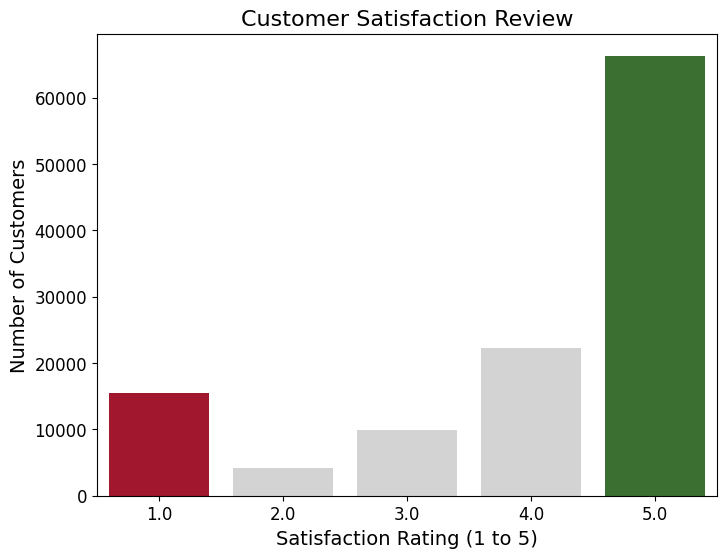

In [136]:
plt.figure(figsize=(8, 6))
colors3= ["#B8001F", "#D3D3D3", "#D3D3D3", "#D3D3D3","#347928"]
sns.countplot(x='review_score', data=all_data, palette=colors3)

plt.title('Customer Satisfaction Review', fontsize=16)
plt.xlabel('Satisfaction Rating (1 to 5)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Dapat dilihat pada bar chart tersebut bahwa customer paling banyak memberikan review score bernilai 5, namun cukup banyak juga yang memberi review score bernilai 1 dibandingkan dengan score 2 dan 3.

## Conclusion

**Pertanyaan 1: Produk mana yang terjual paling banyak dan paling sedikit?**


Kategori produk yang paling banyak dibeli adalah cama_mesa_banho dengan total pembelian sebesar 13697 barang dan kategori produk yang paling sedikit dibeli adalah seguros_e_servicos dengan total produk 2 barang.Dari data tersebut, terlihat ketimpangan yang sangat jauh antara produk yang paling banyak dibeli dan yang paling sedikit.


**Pertanyaan 2: Dari segi lokasi geografis, wilayah mana yang melakukan pembelian terbanyak?**

Berdasarkan explorasi dan visualisasi, daerah yang paling banyak membeli barang dari E-commerce adalah Sao Paulo State (SP) dan untuk kota yaitu Kota Sao Paulo. Perbedaan jumlah pembeli pada Sao Paulo cenderung jauh dibandingkan dengan negara bagian dan kota lainnya.

**Pertanyaan 3:Jenis metode pembayaran apa yang paling umum digunakan oleh customer?**

Beberapa metode pembayaran yaitu ada credit card, boleto, voucher, debit card, dan ada beberapa yang tidak terdeteksi. Dari metode-metode tersebut terdapat metode yang paling sering digunakan yaitu credit card baik di seluruh daerah demografis customer maupun di daerah pembeli terbanyak yaitu Negara bagian Sao Paulo.

**Pertanyaan 4: Berdasarkan umpan balik yang diterima, bagaimana tingkat kepuasan customer terhadap layanan yang diberikan?**

Pada bagian review, customer cenderung memberikan review score tertinggi yaitu 5 yang menggambarkan pembeli sangat puas dengan pelayanan yang diberikan, namun harus tetap meningkatkan kembali pelayanan karena tidak sedikit pula customer yang memberikan review score 1 yang menggambarkan customer sangat tidak puas dengan pelayanan yang diberikan.